In [1]:
import os
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

In [2]:
data_directory = 'ecephys_project_cache' # must be updated to a valid directory in your filesystem

manifest_path = os.path.join(data_directory, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

In [3]:
sessions = cache.get_session_table()

sessions

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"
739448407,2019-10-03T00:00:00Z,716813543,brain_observatory_1.1,112.0,M,wt/wt,625,2221,6,"[grey, VISam, nan, VIS, VISp, VISl, VISrl]"
742951821,2019-10-03T00:00:00Z,723627604,brain_observatory_1.1,120.0,M,wt/wt,893,2219,6,"[VISal, nan, grey, VISl, VISrl, VISp, VISpm, VIS]"
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."
744228101,2019-10-03T00:00:00Z,719817805,brain_observatory_1.1,122.0,M,wt/wt,659,2226,6,"[Eth, TH, LP, POL, APN, DG, CA1, VIS, nan, CA3..."


In [4]:
# session_id = 732592105;
session_id = 732592105;

session = cache.get_session_data(session_id)

# session = cache.get_session_data(sessions.index.values[0])

session.probes

,description,location,sampling_rate,lfp_sampling_rate,has_lfp_data
id,,,,,
733744647,probeB,,29999.915391,1249.996475,True
733744649,probeC,,29999.991665,1249.999653,True
733744651,probeD,,29999.916678,1249.996528,True
733744653,probeE,,29999.984777,1249.999366,True
733744655,probeF,,30000.035326,1250.001472,True


In [5]:
probes = cache.get_probes()

print('Fraction of probes with LFP: ' + str(np.around( np.sum(probes.has_lfp_data) / len(probes), 3) ) )
print(' ')
print('Sessions with missing LFP files: ' + str(list(probes[probes.has_lfp_data == False].ecephys_session_id.unique())))

Fraction of probes with LFP: 0.979
 
Sessions with missing LFP files: [763673393, 831882777, 839557629]


In [6]:
{session.probes.loc[probe_id].description : 
     list(session.channels[session.channels.probe_id == probe_id].ecephys_structure_acronym.unique())
     for probe_id in session.probes.index.values}

{'probeB': [nan, 'VISpm', 'grey'],
 'probeC': [nan, 'VISp', 'grey'],
 'probeD': [nan, 'VISl', 'grey'],
 'probeE': [nan, 'VISal', 'grey'],
 'probeF': [nan, 'VISrl', 'grey']}

In [7]:
probe_id = session.probes[session.probes.description == 'probeC'].index.values[0]

lfp = session.get_lfp(probe_id)

In [8]:
presentation_table = session.stimulus_presentations[session.stimulus_presentations.stimulus_name == 'flashes']

presentation_times = presentation_table.start_time.values
presentation_ids = presentation_table.index.values

In [9]:
trial_window = np.arange(-0.1, 1.0, 1/500)
time_selection = np.concatenate([trial_window + t for t in presentation_times])

inds = pd.MultiIndex.from_product((presentation_ids, trial_window), 
                                  names=('presentation_id', 'time_from_presentation_onset'))

ds = lfp.sel(time = time_selection, method='nearest').to_dataset(name = 'aligned_lfp')

#channel_ids = session.channels[(session.channels.probe_id == probe_id) & \
#                (session.channels.ecephys_structure_acronym.isin(['VISp', 'grey']))].index.values

#ds = ds.sel(channel=slice(np.min(channel_ids), np.max(channel_ids)))

ds = ds.assign(time=inds).unstack('time')

aligned_lfp = ds['aligned_lfp']

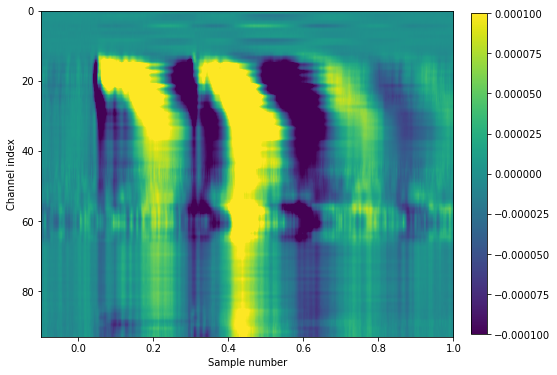

In [10]:
mean_preID = aligned_lfp.mean(dim='presentation_id')
mean_preID1 = mean_preID.to_pandas()
mean_preID1.shape[0]

plt.figure(figsize=(8,6))
im = plt.imshow(aligned_lfp.mean(dim='presentation_id'), aspect='auto', 
                origin='lower', vmin=-1e-4, vmax=1e-4, extent=[-0.1,1.0,mean_preID1.shape[0],0])
_ = plt.colorbar(im, fraction=0.036, pad=0.04)
_ = plt.xlabel('Sample number')
_ = plt.ylabel('Channel index')

In [36]:
mean_preID1.to_csv (r'E:\allen_neuropixels\export_VISp_lfp_mean.csv', index = True, header=True)

<Figure size 720x720 with 0 Axes>

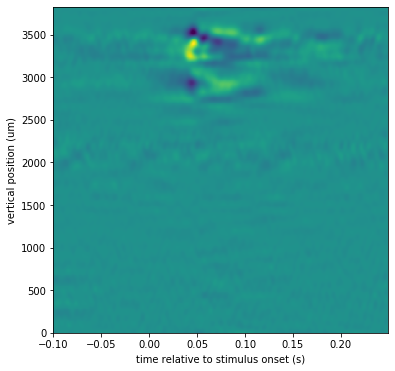

In [62]:
csd = session.get_current_source_density(probe_id)
from scipy.ndimage.filters import gaussian_filter

_ = plt.figure(figsize=(10,10))

filtered_csd = gaussian_filter(csd.data, sigma=(5,1))

fig, ax = plt.subplots(figsize=(6, 6))

_ = ax.pcolor(csd["time"], csd["vertical_position"], filtered_csd, vmin=-3e4, vmax=3e4)

_ = ax.set_xlabel("time relative to stimulus onset (s)")
_ = ax.set_ylabel("vertical position (um)")

In [25]:
csd

<xarray.DataArray 'CSD' (virtual_channel_index: 384, time: 875)>
array([[ 1.01936313e+05, -9.05913318e+03, -1.15504959e+05, ...,
         1.35012224e+05,  1.22367763e+05,  1.07947784e+05],
       [-1.01104198e+05, -4.34907603e+03,  8.86814398e+04, ...,
        -1.55659016e+05, -1.36007115e+05, -1.14078891e+05],
       [-6.73110804e+03, -1.75998268e+03,  2.91676387e+03, ...,
         1.42097866e+04,  7.87721376e+03,  1.24811647e+03],
       ...,
       [-2.96013784e+03,  8.29045850e+01,  2.94900837e+03, ...,
         7.61603879e+03,  5.27804696e+03,  2.78462416e+03],
       [-9.93056776e+04, -6.68123861e+04, -3.55831907e+04, ...,
        -1.69336224e+05, -1.41954981e+05, -1.13673303e+05],
       [ 1.10811900e+05,  7.46058191e+04,  3.99399715e+04, ...,
         1.56244981e+05,  1.33034512e+05,  1.09221691e+05]])
Coordinates:
  * virtual_channel_index  (virtual_channel_index) int32 0 1 2 3 ... 381 382 383
  * time                   (time) float64 -0.1 -0.0996 -0.0992 ... 0.2492 0.2496
    vertical_position      (virtual_channel_index) uint64 0 10 20 ... 3820 3830
    horizontal_position    (virtual_channel_index) uint64 24 24 24 ... 24 24 24